# Assignment 5: Perform handwritten digit classification using logistic regression

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("sample_data/mnist_train_small.csv")


In [ ]:
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().any()

6        False
0        False
0.1      False
0.2      False
0.3      False
         ...  
0.586    False
0.587    False
0.588    False
0.589    False
0.590    False
Length: 785, dtype: bool

In [ ]:
df.describe()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
count,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0
mean,4.470124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215011,0.087704,0.036502,0.013651,0.032602,0.006000,0.0,0.0,0.0,0.0
std,2.892807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.314821,3.921664,2.712527,0.950818,2.718102,0.600333,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,79.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
X = df.drop('6', axis=1)
y = df['6']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

parameters = {'C': [.001, .01, .1, 1, 10, 100]}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv=4, verbose=2, return_train_score=True)
grid.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] END ............................................C=0.001; total time=   8.0s
[CV] END ............................................C=0.001; total time=  13.4s
[CV] END ............................................C=0.001; total time=   9.4s
[CV] END ............................................C=0.001; total time=   5.7s
[CV] END .............................................C=0.01; total time=   7.2s
[CV] END .............................................C=0.01; total time=   7.2s
[CV] END .............................................C=0.01; total time=   7.3s
[CV] END .............................................C=0.01; total time=  12.5s
[CV] END ..............................................C=0.1; total time=   8.6s
[CV] END ..............................................C=0.1; total time=   7.2s
[CV] END ..............................................C=0.1; total time=   7.0s
[CV] END ........................................

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, verbose=2)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([9.10951942, 8.54638851, 7.4803046 , 7.72054148, 7.25428867,
        7.06924778]),
 'std_fit_time': array([2.81814117, 2.28359769, 0.62369202, 0.56874718, 0.22690702,
        0.1547289 ]),
 'mean_score_time': array([0.01549727, 0.01658201, 0.01196879, 0.01458263, 0.01414961,
        0.01395339]),
 'std_score_time': array([0.00485836, 0.00874816, 0.0004257 , 0.00373894, 0.00461697,
        0.00350481]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.90625, 0.91625, 0.903  , 0.88175, 0.8685 , 0.863  ]),
 'split1_test_score': array([0.90275, 0.91575, 0.8995 , 0.879  , 0.87225, 0.869  ]),
 'split2_test_score': array([0.90125, 0.9155 , 0.90625, 0.88225, 0.872  , 0.86725]),
 'split3_test_score': array([0.89622406, 0.

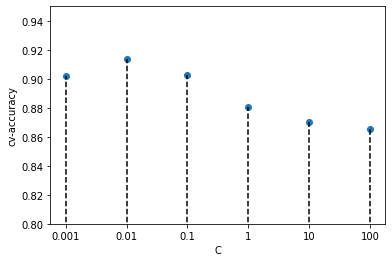

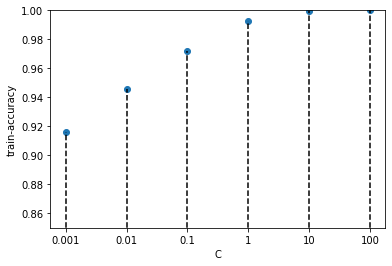

In [ ]:
C_vals = [str(x) for x in parameters['C']]

plt.xlabel("C")
plt.ylabel("cv-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_test_score'])
plt.vlines(C_vals, 0, grid.cv_results_['mean_test_score'], linestyle="dashed")
plt.ylim(0.80,.95)
plt.xticks(C_vals)
plt.show()

plt.xlabel("C")
plt.ylabel("train-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_train_score'])
plt.vlines(C_vals, 0, grid.cv_results_['mean_train_score'], linestyle="dashed")
plt.ylim(0.85,1.00)
plt.xticks(C_vals)
plt.show()

In [ ]:
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 0.01}
Best score: 0.9139317641910476


In [ ]:
model = LogisticRegression(C=.01)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.91675

In [ ]:
for c in parameters['C']:
    model = LogisticRegression(C=c)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(c, accuracy_score(y_test, y_pred))

0.001 0.90775
0.01 0.91675
0.1 0.90725
1 0.89425
10 0.8845
100 0.88175
